In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class Hopfield:
    
    def __init__(self,alpha, sigma,epoch):
        self.weights = np.random.uniform(0,1,(100,100,3))
        self.alpha = alpha
        self.sigma = sigma
        self.epoch = epoch
        input_data =[(139,0,0), (255,0,0), (250,128,114), (255,69,0), (173,255,47),(0,255,0), (0,255,127), (32,178,170), (100,149,237), 
                  (135,206,250), (0,0,128), (0,0,255), (255,215,0), (218,165,32), (240,230,140), (255,255,0), (0,128,128), (0,255,255),
                  (64,224,208), (127,255,212), (139,0,139), (255,0,255), (255,20,147), (255,192,203)]
        output=[]
        for elements in input_data:
            temp=[]
            for i in range(0,3):
                norm = elements[i]/255
                temp.append(norm)
            output.append(tuple(temp))
        self.input = output
        
    def get_winning_node_new(self,input_data):
        min_distance = -1
        location = [-1,-1]
        temp = []
        for index,value in np.ndenumerate(self.weights):
            temp.append(value)
            if(len(temp) == 3):
                distance = np.linalg.norm(input_data - temp)
                if(index[0] == 0 and index[1] == 0):
                    min_distance = distance
                    location[0] = index[0]
                    location[1] = index[1]
                if(distance < min_distance):
                    min_distance = distance
                    location[0] = index[0]
                    location[1] = index[1]
                temp = []
        return location
# using concentric squares to find the neighbourhood 
    def update_weights(self,input_data,winning_node,sigma_k,learning_rate):
        x = winning_node[0]
        y = winning_node[1]
        i_start = x - sigma_k if ((x - sigma_k)>=0) else 0
        i_stop = x + sigma_k  if ((x + sigma_k)<=99) else 9
        j_start = y - sigma_k if ((y - sigma_k)>=0) else 0
        j_stop = y + sigma_k  if ((y + sigma_k)<=99) else 9
        #print(winning_node[0],winning_node[1],i_start,i_stop,j_start,j_stop)
        for i in range(j_start,j_stop+1):
            for j in range(i_start,i_stop+1):
                n_dist = np.linalg.norm(self.weights[x][y] - self.weights[i][j])
                Nc = np.exp((-n_dist**2)/(2*sigma_k**2))
                self.weights[i][j] += learning_rate*Nc*(input_data - self.weights[i][j])
            
    def train(self):
        output = []
        for k in range(0,self.epoch):
            print("The current epoch is:",k)
            learning_rate = self.alpha * np.exp(-k/self.epoch)
            sigma_k = int(np.round(self.sigma * np.exp(-k/self.epoch)))
            if(sigma_k == 0):
                sigma_k = 1
            #do sigma k round
            for colour in self.input:
                winning_node_location = self.get_winning_node_new(np.array(colour))
                self.update_weights(np.array(colour),winning_node_location,sigma_k,learning_rate)
            if k == 19 or k== 39 or k == 99 or k == 149:
                output.append(self.weights)
                print(output)
        return output
    

In [3]:
test1 = Hopfield(0.8,50,150)
result = test1.train()

The current epoch is: 0
The current epoch is: 1
The current epoch is: 2
The current epoch is: 3
The current epoch is: 4
The current epoch is: 5
The current epoch is: 6
The current epoch is: 7
The current epoch is: 8
The current epoch is: 9
The current epoch is: 10
The current epoch is: 11
The current epoch is: 12
The current epoch is: 13
The current epoch is: 14
The current epoch is: 15
The current epoch is: 16
The current epoch is: 17
The current epoch is: 18
The current epoch is: 19
[array([[[5.45098039e-01, 4.94239199e-13, 1.50913325e-14],
        [5.45098039e-01, 4.51224609e-13, 1.15390633e-13],
        [5.45098039e-01, 5.04362459e-13, 1.41542052e-13],
        ...,
        [7.28132079e-01, 6.67068694e-01, 4.45139828e-01],
        [4.57621694e-01, 3.98481089e-01, 3.74317005e-02],
        [1.50975703e-01, 3.80108477e-01, 7.86224642e-01]],

       [[5.45098039e-01, 6.26968901e-13, 1.45298840e-13],
        [5.45098039e-01, 2.57240027e-13, 1.61380231e-13],
        [5.45098039e-01, 1.523

The current epoch is: 65
The current epoch is: 66
The current epoch is: 67
The current epoch is: 68
The current epoch is: 69
The current epoch is: 70
The current epoch is: 71
The current epoch is: 72
The current epoch is: 73
The current epoch is: 74
The current epoch is: 75
The current epoch is: 76
The current epoch is: 77
The current epoch is: 78
The current epoch is: 79
The current epoch is: 80
The current epoch is: 81
The current epoch is: 82
The current epoch is: 83
The current epoch is: 84
The current epoch is: 85
The current epoch is: 86
The current epoch is: 87
The current epoch is: 88
The current epoch is: 89
The current epoch is: 90
The current epoch is: 91
The current epoch is: 92
The current epoch is: 93
The current epoch is: 94
The current epoch is: 95
The current epoch is: 96
The current epoch is: 97
The current epoch is: 98
The current epoch is: 99
[array([[[5.45098039e-01, 4.88371348e-17, 1.49121608e-18],
        [5.45098039e-01, 4.45867448e-17, 1.14020659e-17],
        

The current epoch is: 129
The current epoch is: 130
The current epoch is: 131
The current epoch is: 132
The current epoch is: 133
The current epoch is: 134
The current epoch is: 135
The current epoch is: 136
The current epoch is: 137
The current epoch is: 138
The current epoch is: 139
The current epoch is: 140
The current epoch is: 141
The current epoch is: 142
The current epoch is: 143
The current epoch is: 144
The current epoch is: 145
The current epoch is: 146
The current epoch is: 147
The current epoch is: 148
The current epoch is: 149
[array([[[5.45098039e-01, 4.88371348e-17, 1.49121608e-18],
        [5.45098039e-01, 4.45867448e-17, 1.14020659e-17],
        [5.45098039e-01, 4.98374420e-17, 1.39861596e-17],
        ...,
        [7.28132079e-01, 6.67068694e-01, 4.45139828e-01],
        [4.57621694e-01, 3.98481089e-01, 3.74317005e-02],
        [1.50975703e-01, 3.80108477e-01, 7.86224642e-01]],

       [[5.45098039e-01, 6.19525218e-17, 1.43573780e-17],
        [5.45098039e-01, 2.54185

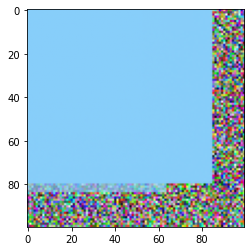

In [9]:
plt.imshow(result[0])

array([5, 7, 9])